### 3.3.3. TRANSFERABILITY ACROSS DIFFERENT DNNS

In [8]:
%matplotlib inline
import torch
import numpy as np
import os
import os.path as osp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from exp_utils import get_overlap, get_cover_ratio
from exp_utils import load_interactions, judge_pattern_type_single_sample, \
    get_significant_threshold, filter_raw_interaction_dict

folders that stores the computed interaction

In [9]:
def get_folder(dataset, arch, seed):
    return {
        "simpleisthree | VGG-13 | s=0":
            "../saved-interactions/dataset=simpleisthree_model=vgg13_bn_epoch=50_bs=128_lr=0.01_logspace=1_seed=0/dim=0-v0_input=integrated_bg_baseline=zero_loss=l1_qthres=0.04_qstd=vN-v0_lr=1e-05_niter=10000",
        "simpleisthree | VGG-13 | s=1":
            "../saved-interactions/dataset=simpleisthree_model=vgg13_bn_epoch=50_bs=128_lr=0.01_logspace=1_seed=1/dim=0-v0_input=integrated_bg_baseline=zero_loss=l1_qthres=0.04_qstd=vN-v0_lr=1e-05_niter=10000",
        "simpleisthree | VGG-16 | s=0":
            "../saved-interactions/dataset=simpleisthree_model=vgg16_bn_epoch=50_bs=128_lr=0.01_logspace=1_seed=0/dim=0-v0_input=integrated_bg_baseline=zero_loss=l1_qthres=0.04_qstd=vN-v0_lr=1e-05_niter=10000",
        "simpleisthree | VGG-16 | s=1":
            "../saved-interactions/dataset=simpleisthree_model=vgg16_bn_epoch=50_bs=128_lr=0.01_logspace=1_seed=1/dim=0-v0_input=integrated_bg_baseline=zero_loss=l1_qthres=0.04_qstd=vN-v0_lr=1e-05_niter=10000",
        "simpleisthree | LeNet | s=0":
            "../saved-interactions/dataset=simpleisthree_model=lenet_epoch=50_bs=128_lr=0.01_logspace=1_seed=0/dim=0-v0_input=integrated_bg_baseline=zero_loss=l1_qthres=0.04_qstd=vN-v0_lr=1e-05_niter=10000",
        "simpleisthree | LeNet | s=1":
            "../saved-interactions/dataset=simpleisthree_model=lenet_epoch=50_bs=128_lr=0.01_logspace=1_seed=1/dim=0-v0_input=integrated_bg_baseline=zero_loss=l1_qthres=0.04_qstd=vN-v0_lr=1e-05_niter=10000",
        "simpleisthree | ResNet-20 | s=0":
            "../saved-interactions/dataset=simpleisthree_model=resnet20_epoch=50_bs=128_lr=0.01_logspace=1_seed=0/dim=0-v0_input=integrated_bg_baseline=zero_loss=l1_qthres=0.04_qstd=vN-v0_lr=1e-05_niter=10000",
        "simpleisthree | ResNet-20 | s=1":
            "../saved-interactions/dataset=simpleisthree_model=resnet20_epoch=50_bs=128_lr=0.01_logspace=1_seed=1/dim=0-v0_input=integrated_bg_baseline=zero_loss=l1_qthres=0.04_qstd=vN-v0_lr=1e-05_niter=10000",
        "simpleisthree | ResNet-32 | s=0":
            "../saved-interactions/dataset=simpleisthree_model=resnet32_epoch=50_bs=128_lr=0.01_logspace=1_seed=0/dim=0-v0_input=integrated_bg_baseline=zero_loss=l1_qthres=0.04_qstd=vN-v0_lr=1e-05_niter=10000",
        "simpleisthree | ResNet-32 | s=1":
            "../saved-interactions/dataset=simpleisthree_model=resnet32_epoch=50_bs=128_lr=0.01_logspace=1_seed=1/dim=0-v0_input=integrated_bg_baseline=zero_loss=l1_qthres=0.04_qstd=vN-v0_lr=1e-05_niter=10000",
        "simpleisthree | ResNet-44 | s=0":
            "../saved-interactions/dataset=simpleisthree_model=resnet44_epoch=50_bs=128_lr=0.01_logspace=1_seed=0/dim=0-v0_input=integrated_bg_baseline=zero_loss=l1_qthres=0.04_qstd=vN-v0_lr=1e-05_niter=10000",
        "simpleisthree | ResNet-44 | s=1":
            "../saved-interactions/dataset=simpleisthree_model=resnet44_epoch=50_bs=128_lr=0.01_logspace=1_seed=1/dim=0-v0_input=integrated_bg_baseline=zero_loss=l1_qthres=0.04_qstd=vN-v0_lr=1e-05_niter=10000",
        "celeba_eyeglasses | AlexNet | s=0":
            "../saved-interactions/dataset=celeba_eyeglasses_model=alexnet_epoch=20_bs=128_lr=0.01_logspace=1_seed=0/dim=0-v0_input=integrated_bg_baseline=zero_loss=l1_qthres=0.04_qstd=vN-v0_lr=1e-05_niter=10000",
        "celeba_eyeglasses | AlexNet | s=1":
            "../saved-interactions/dataset=celeba_eyeglasses_model=alexnet_epoch=20_bs=128_lr=0.01_logspace=1_seed=1/dim=0-v0_input=integrated_bg_baseline=zero_loss=l1_qthres=0.04_qstd=vN-v0_lr=1e-05_niter=10000",
        "celeba_eyeglasses | ResNet-18 | s=0":
            "../saved-interactions/dataset=celeba_eyeglasses_model=resnet18_epoch=20_bs=128_lr=0.01_logspace=1_seed=0/dim=0-v0_input=integrated_bg_baseline=zero_loss=l1_qthres=0.04_qstd=vN-v0_lr=1e-05_niter=10000",
        "celeba_eyeglasses | ResNet-18 | s=1":
            "../saved-interactions/dataset=celeba_eyeglasses_model=resnet18_epoch=20_bs=128_lr=0.01_logspace=1_seed=1/dim=0-v0_input=integrated_bg_baseline=zero_loss=l1_qthres=0.04_qstd=vN-v0_lr=1e-05_niter=10000",
        "celeba_eyeglasses | ResNet-34 | s=0":
            "../saved-interactions/dataset=celeba_eyeglasses_model=resnet34_epoch=20_bs=128_lr=0.01_logspace=1_seed=0/dim=0-v0_input=integrated_bg_baseline=zero_loss=l1_qthres=0.04_qstd=vN-v0_lr=1e-05_niter=10000",
        "celeba_eyeglasses | ResNet-34 | s=1":
            "../saved-interactions/dataset=celeba_eyeglasses_model=resnet34_epoch=20_bs=128_lr=0.01_logspace=1_seed=1/dim=0-v0_input=integrated_bg_baseline=zero_loss=l1_qthres=0.04_qstd=vN-v0_lr=1e-05_niter=10000",
    }[f"{dataset} | {arch} | s={seed}"]

Let us consider two DNNs, $v_1$ and $v_2$, trained for the same task.
Given an input sample $\boldsymbol{x}$, let $\Omega^{v_1}_{\boldsymbol{x}}$ and $\Omega^{v_2}_{\boldsymbol{x}}$ denote the sets of salient concepts extracted by $v_1$ and $v_2$ from the input sample $\boldsymbol{x}$, respectively.
We evaluate the the ratio of concepts in $\Omega^{v_1}_{\boldsymbol{x}}$ encoded by $v_1$, which are also encoded by $v_2$ in $\Omega^{v_2}_{\boldsymbol{x}}$, \emph{i.e.} $\gamma(\Omega^{v_1}_{\boldsymbol{x}}|\Omega^{v_2}_{\boldsymbol{x}})\triangleq |\Omega^{v_1}_{\boldsymbol{x}}\cap \Omega^{v_2}_{\boldsymbol{x}}|/|\Omega^{v_1}_{\boldsymbol{x}}|$, to measure the transferability of salient concepts in $\Omega^{v_1}_{\boldsymbol{x}}$.
A larger ratio $\gamma(\Omega^{v_1}_{\boldsymbol{x}}|\Omega^{v_2}_{\boldsymbol{x}})$ indicates that the extracted salient concepts have higher transferability across different DNNs.

In [10]:
def evaluate_discrete_cover_ratio(i_dict_1, i_dict_2, tau_1, tau_2):
    assert set(i_dict_1.keys()) == set(i_dict_2.keys())

    all_iou_salient_concept = []
    all_iou_random_concept = []
    for sample_name in i_dict_1.keys():
        I_and_or_1 = torch.cat(i_dict_1[sample_name])
        I_and_or_2 = torch.cat(i_dict_2[sample_name])
        threshold_1 = get_significant_threshold(I_and_or_1, significant_ratio=tau_1)
        pattern_type_1 = judge_pattern_type_single_sample(I_and_or_1, threshold_1)
        threshold_2 = get_significant_threshold(I_and_or_2, significant_ratio=tau_2)
        pattern_type_2 = judge_pattern_type_single_sample(I_and_or_2, threshold_2)
        iou = get_cover_ratio(torch.abs(pattern_type_1), torch.abs(pattern_type_2)).item()
        all_iou_salient_concept.append(iou)

        # randomly select concepts
        n_concepts_1 = torch.abs(pattern_type_1).sum().item()
        n_concepts_2 = torch.abs(pattern_type_2).sum().item()
        random_concept_1 = torch.zeros_like(pattern_type_1)
        indices_1 = np.random.choice(random_concept_1.shape[0], n_concepts_1, replace=False)
        random_concept_1[indices_1] = 1
        random_concept_2 = torch.zeros_like(pattern_type_2)
        indices_2 = np.random.choice(random_concept_2.shape[0], n_concepts_2, replace=False)
        random_concept_2[indices_2] = 1
        random_iou = get_overlap(random_concept_1, random_concept_2).item()
        all_iou_random_concept.append(random_iou)

    return all_iou_salient_concept, all_iou_random_concept

plot function

In [11]:
def plot_broken_yaxis(plot_dict, xticklabels, ylim_1, ylim_2, **kwargs):
    ylim_1_ratio = (ylim_1[1] - ylim_1[0]) / (ylim_2[1] - ylim_2[0] + ylim_1[1] - ylim_1[0])
    ylim_2_ratio = (ylim_2[1] - ylim_2[0]) / (ylim_2[1] - ylim_2[0] + ylim_1[1] - ylim_1[0])
    gs = gridspec.GridSpec(2, 1, height_ratios=[ylim_1_ratio, ylim_2_ratio])
    fig = plt.figure(figsize=(3, 2.5))
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    X = np.arange(len(list(plot_dict.values())[0][0]))
    for key in plot_dict.keys():
        ours, baseline = plot_dict[key]
        ax1.plot(X, ours)
        ax2.plot(X, baseline, label=key, linestyle="dotted")

    plt.subplots_adjust(hspace=0.04)
    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.tick_params(labelbottom=False, bottom=False)

    ax2.set_xticks(X)
    ax2.set_xticklabels(xticklabels)

    ax1.set_ylim(ylim_1)
    ax2.set_ylim(ylim_2)

    cut_out_kwargs = dict(color='k', mec='k', mew=1, clip_on=False)
    xlim = ax1.get_xlim()
    dx = .015 * (xlim[1] - xlim[0])
    dy = .01 * (ylim_1[1] - ylim_1[0]) / ylim_1_ratio
    ax1.plot((xlim[0] - dx, xlim[0] + dx), (ylim_1[0] - dy, ylim_1[0] + dy), **cut_out_kwargs)
    ax1.plot((xlim[1] - dx, xlim[1] + dx), (ylim_1[0] - dy, ylim_1[0] + dy), **cut_out_kwargs)
    dy = .01 * (ylim_2[1] - ylim_2[0]) / ylim_2_ratio
    ax2.plot((xlim[0] - dx, xlim[0] + dx), (ylim_2[1] - dy, ylim_2[1] + dy), **cut_out_kwargs)
    ax2.plot((xlim[1] - dx, xlim[1] + dx), (ylim_2[1] - dy, ylim_2[1] + dy), **cut_out_kwargs)
    ax1.set_xlim(xlim)
    ax2.set_xlim(xlim)

    if "no_legend" in kwargs and kwargs["no_legend"]:
        pass
    else:
        ax2.legend(loc='lower right')
    plt.subplots_adjust(left=0.15)

    plt.show()

In [12]:
def main_modelwise_transferability(dataset, arch_list, tau_1_list, tau_2, ylim_1, ylim_2):

    plot_dict = {}

    for arch_1, arch_2 in arch_list:
        mean_cr_list = [[], []]  # cover ratio w.r.t. extracted/random concepts
        i_dict_1 = load_interactions(dataset, get_folder(dataset, arch_1, seed=0))
        i_dict_1 = filter_raw_interaction_dict(i_dict_1)
        i_dict_2 = load_interactions(dataset, get_folder(dataset, arch_2, seed=1))
        i_dict_2 = filter_raw_interaction_dict(i_dict_2)

        for tau_1 in tau_1_list:
            all_cr, random_cr = evaluate_discrete_cover_ratio(
                i_dict_1, i_dict_2, tau_1=tau_1, tau_2=tau_2
            )
            mean_cr_list[0].append(np.mean(all_cr))
            mean_cr_list[1].append(np.mean(random_cr))

        plot_key = f"{arch_1}->{arch_2}"
        plot_dict[plot_key] = mean_cr_list

    plot_broken_yaxis(
        plot_dict=plot_dict, xticklabels=tau_1_list, 
        ylim_1=ylim_1, ylim_2=ylim_2,
    )

*MNIST-3* dataset

loading: 100%|████████████| 100/100 [00:00<00:00, 858.45it/s, --> LOADING sample_01001 FROM class_1]


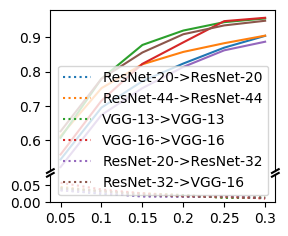

In [13]:
dataset = "simpleisthree"
arch_list = [
    ("ResNet-20", "ResNet-20"),
    ("ResNet-44", "ResNet-44"),
    ("VGG-13", "VGG-13"),
    ("VGG-16", "VGG-16"),
    ("ResNet-20", "ResNet-32"),
    ("ResNet-32", "VGG-16"),
]
tau_1_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
tau_2 = 0.05
main_modelwise_transferability(dataset, arch_list, tau_1_list, tau_2, [0.51, 0.98], [0.0, 0.08])

*CelebA-eyeglasses* dataset

loading: 100%|██████████████| 50/50 [00:00<00:00, 874.20it/s, --> LOADING sample_00999 FROM class_1]


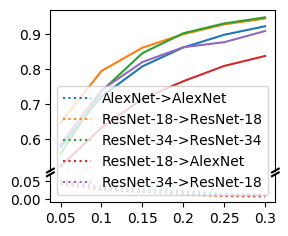

In [14]:
dataset = "celeba_eyeglasses"
arch_list = [
    ("AlexNet", "AlexNet"),
    ("ResNet-18", "ResNet-18"),
    ("ResNet-34", "ResNet-34"),
    ("ResNet-18", "AlexNet"),
    ("ResNet-34", "ResNet-18")
]
tau_1_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
tau_2 = 0.05
main_modelwise_transferability(dataset, arch_list, tau_1_list, tau_2, [0.51, 0.97], [-0.01, 0.07])